In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from google.colab import files
files.upload()

Output hidden; open in https://colab.research.google.com to view.

In [7]:
import pandas as pd

df = pd.read_csv("marketing_AB.csv")
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [8]:
df.shape
df.columns
df['test group'].value_counts()

,count
test group,
ad,564577
psa,23524


In [9]:
control = df[df['test group'] == 'psa']['converted']
test = df[df['test group'] == 'ad']['converted']

In [10]:
#Calculate Conversion Rates
control_rate = control.mean()
test_rate = test.mean()

control_rate, test_rate

(np.float64(0.01785410644448223), np.float64(0.025546559636683747))

In [11]:
#Hypotheses & Alpha
alpha = 0.05

H0 (Null Hypothesis):
There is no difference in conversion rates between the control (PSA) and test (Ad) groups.

H1 (Alternative Hypothesis):
There is a significant difference in conversion rates between the control and test groups.

In [12]:
#Hypothesis Test (Independent t-test)
from scipy import stats

t_stat, p_value = stats.ttest_ind(test, control)

t_stat, p_value

(np.float64(7.37040597428566), np.float64(1.7033052627831264e-13))

In [13]:
#Decision Based on p-value
if p_value < alpha:
    decision = "Reject H0: Statistically significant difference"
else:
    decision = "Fail to reject H0: No statistically significant difference"

decision

'Reject H0: Statistically significant difference'

In [14]:
#95% Confidence Interval for Difference
diff = test_rate - control_rate

se = np.sqrt(
    test.var()/len(test) +
    control.var()/len(control)
)

ci_low = diff - 1.96 * se
ci_high = diff + 1.96 * se

(ci_low, ci_high)

(np.float64(0.005950865393694846), np.float64(0.009434040990708189))

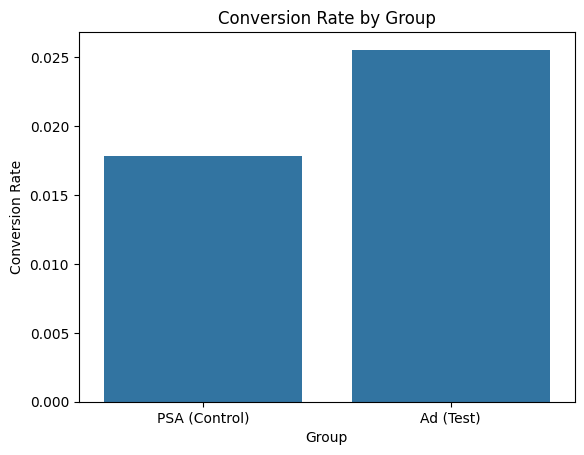

In [15]:
#Conversion Rate Bar Chart
import seaborn as sns
import matplotlib.pyplot as plt

summary = pd.DataFrame({
    'Group': ['PSA (Control)', 'Ad (Test)'],
    'Conversion Rate': [control_rate, test_rate]
})

sns.barplot(x='Group', y='Conversion Rate', data=summary)
plt.title("Conversion Rate by Group")
plt.show()

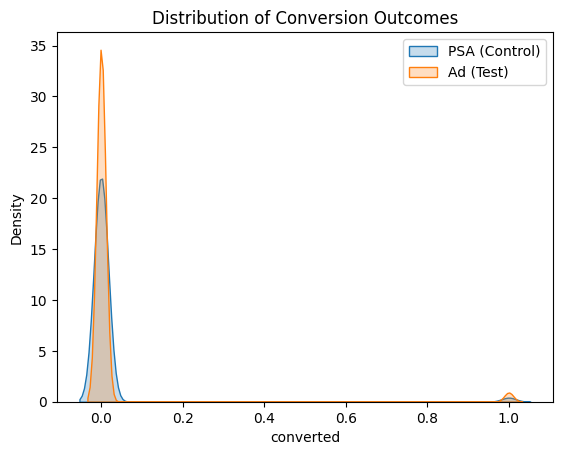

In [16]:
#Distribution Plot
sns.kdeplot(control, label='PSA (Control)', fill=True)
sns.kdeplot(test, label='Ad (Test)', fill=True)
plt.legend()
plt.title("Distribution of Conversion Outcomes")
plt.show()

In [17]:
summary.to_csv("ab_test_summary.csv", index=False)